<a href="https://colab.research.google.com/github/Eltensy/data-science-school-2025/blob/main/Data_Science_School_E_commerce_Customer_Behavior_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Anton Brezin, Data Science School
# PART ONE
import pandas as pd
import seaborn as sns # for last bonus task
!git clone https://github.com/Godod/pandas-workshop
!unzip /content/pandas-workshop/work/e-commerce-customer-behavior-dataset.zip -d ./cloned/

fatal: destination path 'pandas-workshop' already exists and is not an empty directory.
Archive:  /content/pandas-workshop/work/e-commerce-customer-behavior-dataset.zip
replace ./cloned/E-commerce Customer Behavior - Sheet1.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ./cloned/E-commerce Customer Behavior - Sheet1.csv  


In [ ]:
df = pd.read_csv('/content/cloned/E-commerce Customer Behavior - Sheet1.csv')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,275.500000,33.597143,845.381714,12.600000,4.019143,26.588571
std,101.180532,4.870882,362.058695,4.155984,0.580539,13.440813
min,101.000000,26.000000,410.800000,7.000000,3.000000,9.000000
25%,188.250000,30.000000,502.000000,9.000000,3.500000,15.000000
50%,275.500000,32.500000,775.200000,12.000000,4.100000,23.000000
75%,362.750000,37.000000,1160.600000,15.000000,4.500000,38.000000
max,450.000000,43.000000,1520.100000,21.000000,4.900000,63.000000


In [ ]:
df.shape

(350, 11)

In [ ]:
df.head(5)

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [ ]:
nls = df.isnull().sum()
display(nls)
# Знайдено 2 Null значення в Satisfaction Level

,0
Customer ID,0
Gender,0
Age,0
City,0
Membership Type,0
Total Spend,0
Items Purchased,0
Average Rating,0
Discount Applied,0
Days Since Last Purchase,0


In [ ]:
df["Satisfaction Level"].fillna('Neutral', inplace = True)
new_nls = df.isnull().sum()
display(new_nls)
# Null значення замінені на Neutral, тепер всі дані коректно заповнені

/tmp/ipython-input-141-2551715988.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Satisfaction Level"].fillna('Neutral', inplace = True)


,0
Customer ID,0
Gender,0
Age,0
City,0
Membership Type,0
Total Spend,0
Items Purchased,0
Average Rating,0
Discount Applied,0
Days Since Last Purchase,0


In [ ]:
df.info()
# Всі типи коректно встановлені до відповідних даних

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        350 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


In [ ]:
df.describe()
# Середні вік 33.59, середні витрати 845.38, в середньому кастомери повертаються через 13.44 дні після останньої покупки

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,275.500000,33.597143,845.381714,12.600000,4.019143,26.588571
std,101.180532,4.870882,362.058695,4.155984,0.580539,13.440813
min,101.000000,26.000000,410.800000,7.000000,3.000000,9.000000
25%,188.250000,30.000000,502.000000,9.000000,3.500000,15.000000
50%,275.500000,32.500000,775.200000,12.000000,4.100000,23.000000
75%,362.750000,37.000000,1160.600000,15.000000,4.500000,38.000000
max,450.000000,43.000000,1520.100000,21.000000,4.900000,63.000000


In [ ]:
# PART TWO
df["Avg Spend per Item"] = df["Total Spend"].divide(df["Items Purchased"])

filtered_df = df[df['Items Purchased'] == 0]
#display(filtered_df) # виводить проблемні елементи, які передбачають ділення на 0
display(df)

# Викорстав функцію .divide(), щоб запобігти помилок з діленням на 0 (нульових значень там немає, але на всякий випадок)

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,Avg Spend per Item
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied,80.014286
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral,70.954545
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied,56.750000
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied,77.910526
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied,55.415385
...,...,...,...,...,...,...,...,...,...,...,...,...
345,446,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied,66.030000
346,447,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral,58.812500
347,448,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied,74.425000
348,449,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral,70.927273


In [ ]:
df['Activity Status'] = df['Days Since Last Purchase'].apply(lambda x: 'Active' if x<=30 else 'Inactive')
df.head(5)

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,Avg Spend per Item,Activity Status
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied,80.014286,Active
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral,70.954545,Active
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied,56.750000,Inactive
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied,77.910526,Active
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied,55.415385,Inactive


In [ ]:
# PART THREE

df.groupby(['Membership Type']).agg({
    'Total Spend': 'mean',
    'Items Purchased': 'mean',
    'Average Rating': 'mean'
}).sort_values(by='Total Spend', ascending=False)

# Тип Gold приносить найбільше доходу та є найбільш задоволеним

,Total Spend,Items Purchased,Average Rating
Membership Type,,,
Gold,1311.144444,17.615385,4.675214
Silver,748.432479,11.658120,4.051282
Bronze,473.388793,8.491379,3.325000


In [ ]:
df.groupby(['Discount Applied']).agg({
    'Total Spend': 'mean',
    'Items Purchased': 'mean'
}).sort_values(by='Total Spend', ascending=False)

# Люди, які не використовують знижки, тратять більше грошей та купують більше товарів

,Total Spend,Items Purchased
Discount Applied,,
False,903.489714,13.074286
True,787.273714,12.125714


In [ ]:
young_df = df.sort_values(by='Age', ascending=True)
old_df = df.sort_values(by='Age', ascending=False)

# Датафрейми з сортуванням по віку

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,Avg Spend per Item,Activity Status
349,450,Female,43,Chicago,Bronze,515.75,10,3.3,True,49,Unsatisfied,51.575000,Inactive
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied,56.750000,Inactive
313,414,Female,43,Chicago,Bronze,505.75,10,3.3,True,46,Unsatisfied,50.575000,Inactive
223,324,Female,43,Chicago,Bronze,505.75,10,3.3,True,39,Unsatisfied,50.575000,Inactive
241,342,Female,43,Chicago,Bronze,525.75,9,3.3,True,40,Unsatisfied,58.416667,Inactive


In [ ]:
young_df_limit = young_df.head(5)

young_df_limit.agg({
    'Total Spend': 'mean',
    'Days Since Last Purchase': 'mean'
})

,0
Total Spend,690.6
Days Since Last Purchase,47.0


In [ ]:
old_df_limit = old_df.head(5)

old_df.agg({
    'Total Spend': 'mean',
    'Days Since Last Purchase': 'mean'
})

# Є помітна різниця, молоде покоління тратить значно більше грошей (690 > 512), але повертається для наступних покупок через трохи більший проміжок часу (47 > 43)

,0
Total Spend,512.75
Days Since Last Purchase,43.20


In [ ]:
test = df[df['Membership Type'] == 'Gold'].groupby(['Gender', 'Satisfaction Level']).agg({
    'Customer ID':  'count'
})

display(test)

df.groupby(['Gender'])['Customer ID'].count()

# Всі члени з Gold статусом мають однаковий рівень задоволення: Satisfied
# Чоловіків є на одного (1) більше ніж жінок зі статусом Gold
# Зі всієї вибірки чоловіків і жінок є однаково (175 = 175), тобто 50%

,,Customer ID
Gender,Satisfaction Level,
Female,Satisfied,58
Male,Satisfied,59


,Customer ID
Gender,
Female,175
Male,175


In [ ]:
df.groupby(['Gender', 'Satisfaction Level'])['Customer ID'].count()

# Ні, чоловіки є більш задоволені, а у серед жінок практично однакові значення, тобто чоловіки мають вищий рівень задоволеності

Gender  Satisfaction Level
Female  Neutral               58
        Satisfied             58
        Unsatisfied           59
Male    Neutral               51
        Satisfied             67
        Unsatisfied           57
Name: Customer ID, dtype: int64

Text(0.5, 0, 'Тип членства (Membership Type)')

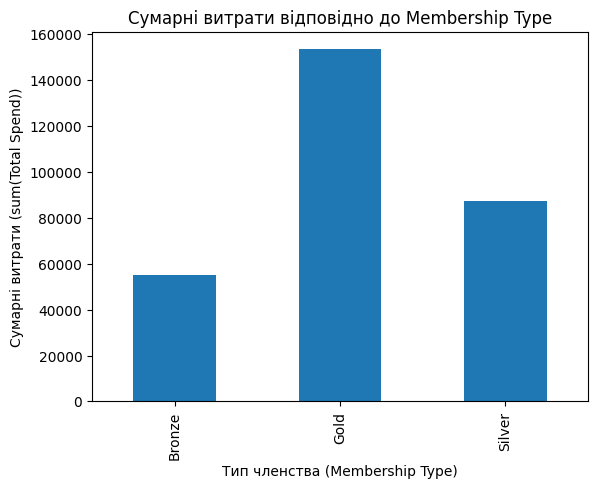

In [ ]:
# PART FOUR

plt1 = df.groupby('Membership Type')['Total Spend'].sum().plot(
    kind="bar",
    title="Сумарні витрати відповідно до Membership Type"
)
plt1.set_ylabel('Сумарні витрати (sum(Total Spend))')
plt1.set_xlabel('Тип членства (Membership Type)')

Text(0.5, 0, 'Вік (Age)')

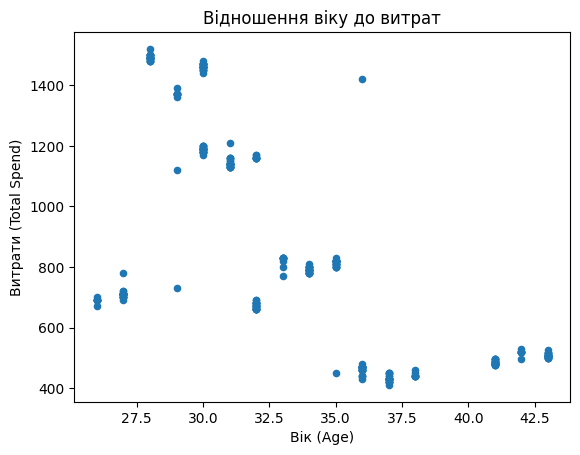

In [ ]:
plt = df.plot(
    kind="scatter",
    x="Age",
    y="Total Spend",
    title="Відношення віку до витрат",
)
plt.set_ylabel('Витрати (Total Spend)')
plt.set_xlabel('Вік (Age)')

In [ ]:
# PART FIVE (BONUS)
display(df)
spendmean = df['Total Spend'].mean()
#df.loc(df["Membership Type"] == "Gold" & df["Total Spend"] > spendmean, "VIP")
df['Membership Type'].mask(
    (df['Membership Type'] == 'Gold') & (df["Total Spend"].astype(int) > int(spendmean)),
    'VIP',
    inplace=True
)
avgratingvip = df[df['Membership Type'] == "VIP"].groupby('Satisfaction Level')['Average Rating'].mean()
avgrating = df['Average Rating'].mean()

display(avgrating)
display(avgratingvip)

# Сер. рейтинг для всіх: 4.019, Сер. рейтинг для ВІП: 4.675 => ВІП Клієнти більш задоволені
# (погано візуалізовано, але дані виведено)

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,Avg Spend per Item,Activity Status
0,101,Female,29,New York,VIP,1120.20,14,4.6,True,25,Satisfied,80.014286,Active
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral,70.954545,Active
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied,56.750000,Inactive
3,104,Male,30,San Francisco,VIP,1480.30,19,4.7,False,12,Satisfied,77.910526,Active
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied,55.415385,Inactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,446,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied,66.030000,Inactive
346,447,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral,58.812500,Active
347,448,Female,30,New York,VIP,1190.80,16,4.5,True,28,Satisfied,74.425000,Active
348,449,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral,70.927273,Active


/tmp/ipython-input-130-2270716435.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Membership Type'].mask(


np.float64(4.019142857142858)

,Average Rating
Satisfaction Level,
Satisfied,4.675214


<Axes: >

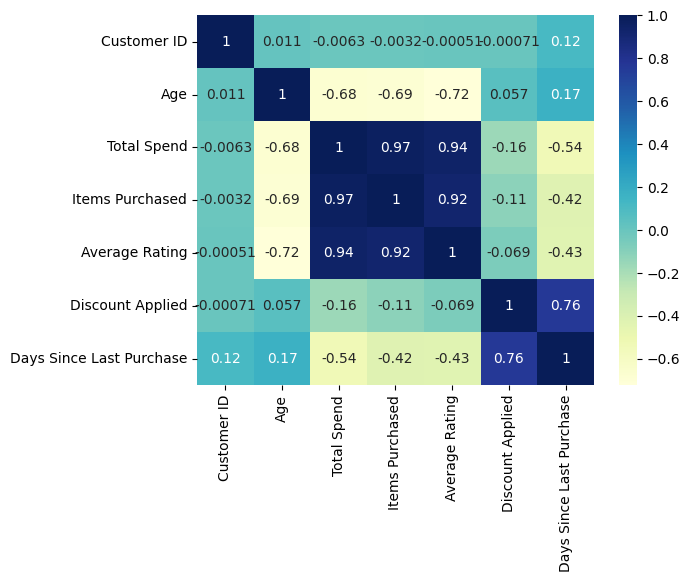

In [ ]:
co_mtx = df.corr(numeric_only=True)
sns.heatmap(co_mtx, cmap="YlGnBu", annot=True)

# 0.97 = найбільша позитивна кореляція, це означає що співвідношення Куплених айтемів та Потрачений грошей пропорційно один одному.
# 0.94 = друга по позитивності кореляція, означає що цим більше людина платить грошей, тим більше рейтинг вона ставить